In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

In [28]:
xs = np.linspace(-10,10,100)
ys = sigmoid(xs)
dys = sigmoid_derivative(ys)

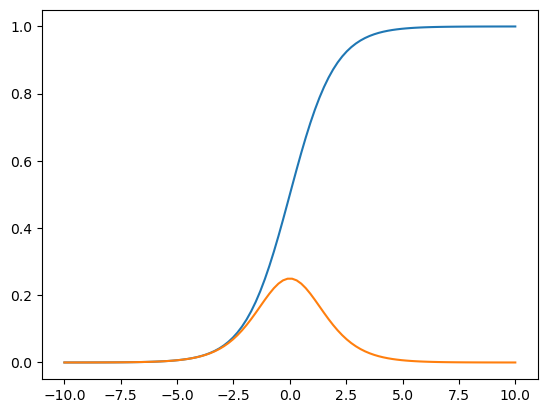

In [29]:
plt.plot(xs, ys)
plt.plot(xs, dys)

In [10]:
inputs = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
outputs = np.array([[0], [1], [1], [0]])

np.random.seed(1)
weights_input_hidden = np.random.rand(2, 4)
weights_hidden_output = np.random.rand(4, 1)

In [11]:
print(weights_input_hidden)
print(weights_hidden_output)

[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]]
[[0.39676747]
 [0.53881673]
 [0.41919451]
 [0.6852195 ]]


In [14]:
hidden_layer_input = np.dot(inputs, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
print(hidden_layer_input)
print(hidden_layer_output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]
 [4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [5.63777896e-01 8.12663088e-01 1.86374586e-01 6.47893300e-01]]
[[0.5        0.5        0.5        0.5       ]
 [0.53662327 0.52306826 0.5464309  0.58554065]
 [0.60277042 0.67267847 0.50002859 0.57501263]
 [0.63732622 0.6926767  0.54645924 0.65653557]]


In [15]:
final_input = np.dot(hidden_layer_output, weights_hidden_output)
final_output = sigmoid(final_input)
print(final_input)
print(final_output)

[[1.01999911]
 [1.1250373 ]
 [1.20522923]
 [1.3050398 ]]
[[0.73497243]
 [0.75492189]
 [0.76945373]
 [0.78668195]]


In [16]:
error = outputs - final_output
print(error)

[[-0.73497243]
 [ 0.24507811]
 [ 0.23054627]
 [-0.78668195]]


In [17]:
# 역전파
d_output = error * sigmoid_derivative(final_output)
d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)
print(d_output)
print(d_hidden)

[[-0.14316378]
 [ 0.04534309]
 [ 0.04089768]
 [-0.13201582]]
[[-0.01420068 -0.01928476 -0.01500337 -0.02452465]
 [ 0.00447354  0.0060949   0.00471092  0.00754015]
 [ 0.00388533  0.00485201  0.00428602  0.00684829]
 [-0.0121071  -0.01514234 -0.01371563 -0.02039838]]


In [ ]:
# 가중치 업데이트
print(weights_hidden_output)
print(weights_input_hidden)

weights_hidden_output += hidden_layer_output.T.dot(d_output) * 0.1
weights_input_hidden += inputs.T.dot(d_hidden) * 0.1

print(weights_hidden_output)
print(weights_input_hidden)


[[0.39676747]
 [0.53881673]
 [0.41919451]
 [0.6852195 ]] [[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]]
[[0.38609398]
 [0.52763697]
 [0.40934489]
 [0.67440069]] [[ 0.41619983  0.71929546 -0.00082859  0.30097756]
 [ 0.14599253  0.09143385  0.18535974  0.3442749 ]]


In [ ]:
inputs = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
outputs = np.array([[0], [1], [1], [0]])

np.random.seed(1)
weights_input_hidden = np.random.rand(2, 4)
weights_hidden_output = np.random.rand(4, 1)

for epoch in range(10000):
    # 순전파
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output)
    final_output = sigmoid(final_input)

    # 오차 계산
    error = outputs - final_output # 손실함수는 1/2*(y - yhet)^2

    # 역전파
    d_output = error * sigmoid_derivative(final_output) # w2 가 변화했을 때, output의 변화량
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output) #w1이 변했을 때에 아웃풋의 변화량

    # 가중치 업데이트
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * 0.1
    weights_input_hidden += inputs.T.dot(d_hidden) * 0.1

# 결과 출력
print("학습된 출력값:")
print(final_output)

학습된 출력값:
[[0.15872741]
 [0.85146619]
 [0.84676971]
 [0.14988192]]


In [9]:
weights_hidden_output

array([[-2.74217404],
       [-4.29621522],
       [-4.9038123 ],
       [ 8.60626546]])

In [10]:
weights_input_hidden

array([[ 0.98501806,  4.01579119, -1.95863978,  4.75362317],
       [-0.11402551, -1.73269041,  4.39609702,  4.70482385]])

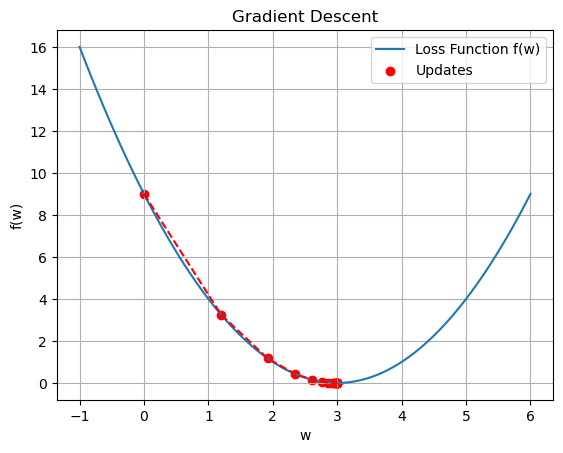

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 함수와 도함수 정의
def f(w):
    return (w - 3)**2

def grad_f(w):
    return 2 * (w - 3)

# 초기값, 학습률
w = 0  # 시작점
lr = 0.2  # 학습률
w_history = [w]

# 경사하강법 반복
for _ in range(20):
    w -= lr * grad_f(w)
    w_history.append(w)

# 시각화
w_vals = np.linspace(-1, 6, 100)
f_vals = f(w_vals)

plt.plot(w_vals, f_vals, label='Loss Function f(w)')
plt.scatter(w_history, f(np.array(w_history)), color='red', label='Updates')
plt.plot(w_history, f(np.array(w_history)), color='red', linestyle='--')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.title('Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()
